In [48]:
#random forest bla bla 
#imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier

from scipy.stats import randint

import matplotlib as mpl
import matplotlib.pyplot as plt


In [72]:
#random forest classifier
# instance_based_df = pd.read_csv("data_new/instance_based_df_2.csv")
# instance_based_target = instance_based_df['label']
# y = instance_based_target.round() #y is je target dus de label
# instance_based_cont = instance_based_df.drop('label', axis = 1)
# X = instance_based_cont #X zijn je features

# column_indices = {name: i for i, name in enumerate(X.columns)}
# num_features = X.shape[1]

# n = len(X)
# X_train = X[0:int(n*0.7)]
# X_validation = X[int(n*0.7):int(n*0.9)]
# X_test = X[int(n*0.9):]

# m = len(y)
# y_train = y[0:int(m*0.7)]
# y_validation = y[int(m*0.7):int(m*0.9)]
# y_test = y[int(m*0.9):]


def round_of_rating(number):
        return round(number * 2) / 2.0

instance_based_df = pd.read_csv("data_new/instance_based_df_2.csv")
train = instance_based_df[:-int(len(instance_based_df)/10)]
test = instance_based_df[-int(len(instance_based_df)/10):]
X_train, y_train = train.loc[:, train.columns != 'label'], train['label'].round()
X_test, y_test = test.loc[:, test.columns != 'label'], test['label'].round()



Best hyperparameters: {'max_depth': 1, 'n_estimators': 343}
              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         1
         7.0       0.56      1.00      0.71         5
         8.0       0.00      0.00      0.00         3

    accuracy                           0.56         9
   macro avg       0.19      0.33      0.24         9
weighted avg       0.31      0.56      0.40         9



c:\Users\Ikhlasse\anaconda3\envs\DL\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ikhlasse\anaconda3\envs\DL\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ikhlasse\anaconda3\envs\DL\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


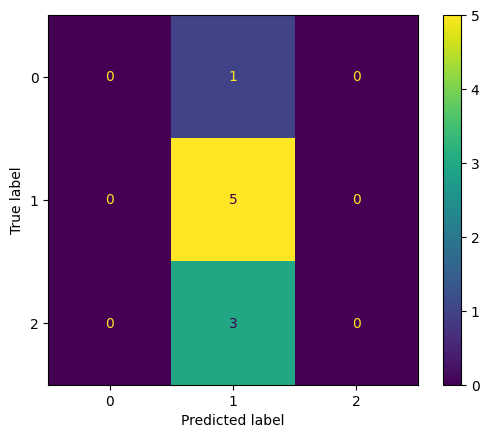

In [73]:
#model fitting en evaluation
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

#prediction
# y_prediction = rf_classifier.predict(X_validation)
# accuracy = accuracy_score(y_validation, y_prediction)
# print("Accuracy:", accuracy)

#hyperparameter tuning
param_dist = {'n_estimators': randint(20,500),
              'max_depth': randint(1,20)}

#random search gebruiken om de beste hyperparameters te vinden, n_iter (the number of parameter settings that are sampled) and cv (the number of cross-validation folds to use)
rand_search = RandomizedSearchCV(rf_classifier, param_distributions= param_dist, n_iter=5, cv=None, random_state=0)  
                                                                                                  
#random search fitten op data
rand_search.fit(X_train, y_train)

#create variable for best model
best_rf_classifier = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

#confusion matrix (tradeoff between false positives (top right) and false negatives(bottom left)
y_pred = best_rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix= cm).plot()

#precision, recall, accuracy, F1-score, support
print(classification_report(y_test, y_pred))


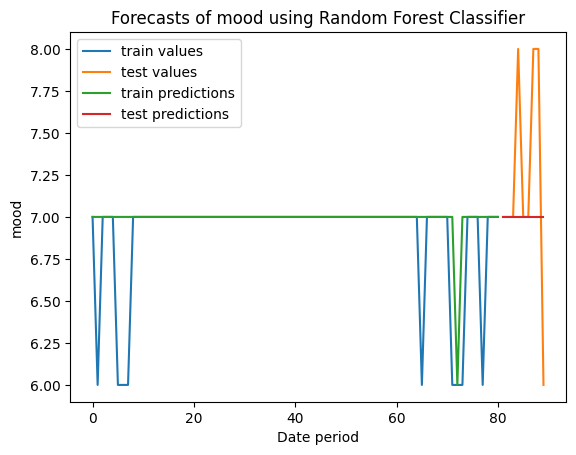

In [74]:
y_train_preds = best_rf_classifier.predict(X_train)
y_test_preds = best_rf_classifier.predict(X_test)

plt.plot(pd.Series(y_train, index=train.index), label='train values')
plt.plot(pd.Series(y_test, index=test.index), label='test values')
plt.plot(pd.Series(y_train_preds, index=train.index), label='train predictions')
plt.plot(pd.Series(y_test_preds, index=test.index), label='test predictions')
plt.xlabel('Date period')
plt.ylabel('mood')
plt.title('Forecasts of mood using Random Forest Classifier')
plt.legend()
plt.show()

<Axes: >

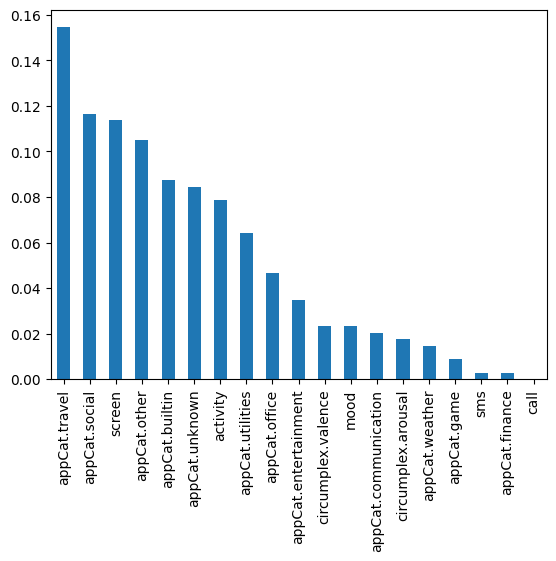

In [75]:
# feature importances 
feature_importances = pd.Series(best_rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [76]:
#random forest regression
# instance_based_df = pd.read_csv("data_new/instance_based_df_2.csv")
# instance_based_target = instance_based_df['label']
# y = instance_based_target #y is je target dus de mood_avg_next
# instance_based_cont = instance_based_df.drop('label', axis = 1)
# X = instance_based_cont #X zijn je features

# column_indices = {name: i for i, name in enumerate(X.columns)}
# num_features = X.shape[1]

# n = len(X)
# X_train = X[0:int(n*0.7)]
# X_validation = X[int(n*0.7):int(n*0.9)]
# X_test = X[int(n*0.9):]

# m = len(y)
# y_train = y[0:int(m*0.7)]
# y_validation = y[int(m*0.7):int(m*0.9)]
# y_test = y[int(m*0.9):]

instance_based_df = pd.read_csv("data_new/instance_based_df_2.csv")
train = instance_based_df[:-int(len(instance_based_df)/10)]
test = instance_based_df[-int(len(instance_based_df)/10):]
X_train, y_train = train.loc[:, train.columns != 'label'], train['label']
X_test, y_test = test.loc[:, test.columns != 'label'], test['label']

In [77]:
#model fitting en evaluation
rf_regression = RandomForestRegressor()
rf_regression.fit(X_train, y_train)

# #prediction
# predictions = rf_regression.predict(X_validation)

# #evaluation
# mse = mean_squared_error(y_validation, predictions)
# print(f"Mean Squared Error: {mse}")

# r2 = r2_score(y_validation, predictions)
# print(f"R2 score: {r2}")

# mae = mean_absolute_error(y_validation, predictions)
# print(f"Mean Absolute Error: {mae}")

#hyperparameter tuning
param_dist = {'n_estimators': randint(20,500),
              'max_depth': randint(1,20)}

#random search gebruiken om de beste hyperparameters te vinden, n_iter (the number of parameter settings that are sampled) and cv (the number of cross-validation folds to use)
rand_search = RandomizedSearchCV(rf_regression, param_distributions= param_dist, n_iter=5, cv=5)  
                                                                                                  
#random search fitten op data
rand_search.fit(X_train, y_train)

#create variable for best model
best_rf_regressor = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

#prediction
predictions = best_rf_regressor.predict(X_test)
y_train_preds = best_rf_regressor.predict(X_train)
y_test_preds = best_rf_regressor.predict(X_test)

#evaluation
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, predictions)
print(f"R2 score: {r2}")

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")


Best hyperparameters: {'max_depth': 8, 'n_estimators': 371}
Mean Squared Error: 0.3861612499259785
R2 score: -0.7225206583616126
Mean Absolute Error: 0.4463935745237969


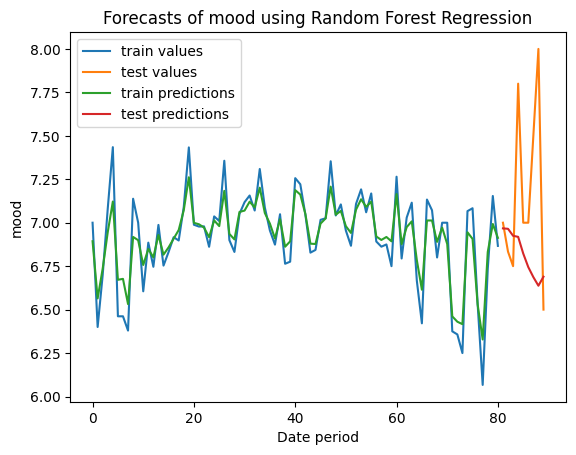

In [78]:
plt.plot(pd.Series(y_train, index=train.index), label='train values')
plt.plot(pd.Series(y_test, index=test.index), label='test values')
plt.plot(pd.Series(y_train_preds, index=train.index), label='train predictions')
plt.plot(pd.Series(y_test_preds, index=test.index), label='test predictions')
plt.xlabel('Date period')
plt.ylabel('mood')
plt.title('Forecasts of mood using Random Forest Regression')
plt.legend()
plt.show()

<Axes: >

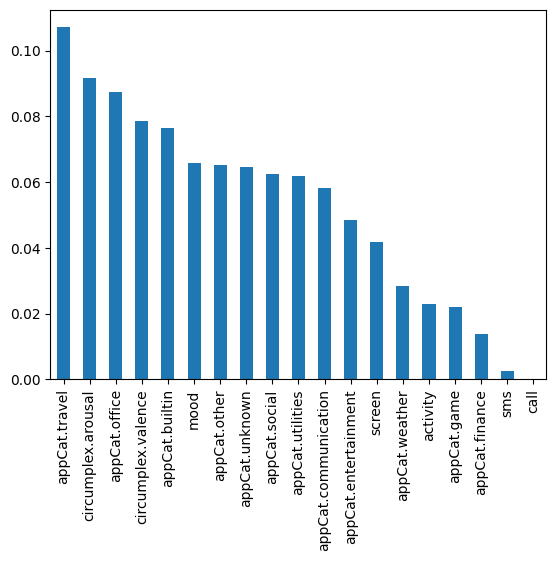

In [79]:
# feature importances 
feature_importances = pd.Series(best_rf_regressor.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [80]:
# another regression

In [88]:
import statsmodels.api as sm
import numpy as np

# df = pd.read_csv("data_new/sans_nans_1.csv")
# time = pd.to_datetime(df.pop('date') , format='%Y-%m-%d')
# series = df['mood']
# series.index = time


# # function for generating the lagged matrix
# def split_sequence(sequence, window_size):
#     X = []
#     y = []
#     # for all indexes
#     for i in range(len(sequence)):
#         end_idx = i + window_size
#         # exit condition
#         if end_idx > len(sequence) - 1:
#             break
#         # get X and Y values
#         seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
#         X.append(seq_x)
#         y.append(seq_y)
#     return np.array(X), np.array(y)


# train = series[:-int(len(series)/10)]
# test = series[-int(len(series)/10):]
# X_train, y_train = split_sequence(train, window_size=7)
# X_test, y_test = split_sequence(test, window_size=7)

instance_based_df = pd.read_csv("data_new/instance_based_df_2.csv")
train = instance_based_df[:-int(len(instance_based_df)/10)]
test = instance_based_df[-int(len(instance_based_df)/10):]
X_train, y_train = train.loc[:, train.columns != 'label'], train['label']
X_test, y_test = test.loc[:, test.columns != 'label'], test['label']

# instance_based_target = instance_based_df['label']
# y = instance_based_target #y is je target dus de label
# instance_based_cont = instance_based_df.drop('label', axis = 1)
# X = instance_based_cont #X zijn je features

# # column_indices = {name: i for i, name in enumerate(X.columns)}
# # num_features = X.shape[1]

# # n = len(X)
# # X_train = X[0:int(n*0.8)]
# # X_test = X[int(n*0.8):]

# # m = len(y)
# # y_train = y[0:int(m*0.8)]
# # y_test = y[int(m*0.8):]

# # train Ordinary Least Squares model
X_train = sm.add_constant(X_train)
# model = sm.Logit(y_train, X_train)
model = sm.GLS(y_train, X_train)
result = model.fit()

print(result.summary())


                            GLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.374
Model:                            GLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.060
Date:                Sun, 21 Apr 2024   Prob (F-statistic):             0.0187
Time:                        09:14:23   Log-Likelihood:                 10.431
No. Observations:                  81   AIC:                             17.14
Df Residuals:                      62   BIC:                             62.63
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
mood                    -2.0444 

In [89]:
X_test = sm.add_constant(X_test)

y_train_preds = result.predict(X_train)
y_test_preds = result.predict(X_test)

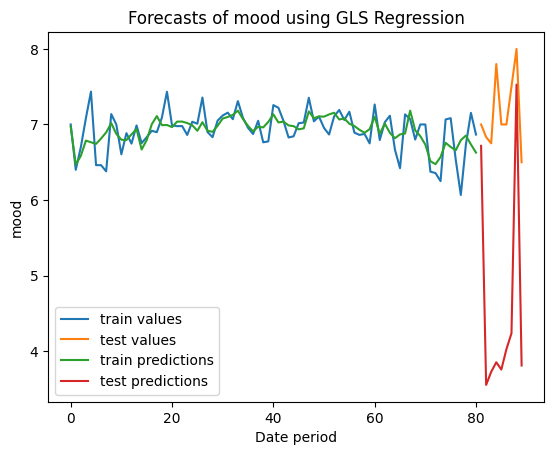

In [86]:
from matplotlib import pyplot as plt


plt.plot(pd.Series(y_train, index=train.index), label='train values')
plt.plot(pd.Series(y_test, index=test.index), label='test values')
plt.plot(pd.Series(y_train_preds, index=train.index), label='train predictions')
plt.plot(pd.Series(y_test_preds, index=test.index), label='test predictions')
plt.xlabel('Date period')
plt.ylabel('mood')
plt.title('Forecasts of mood using GLS Regression')
plt.legend()
plt.show()